# Assignment week 12 

For this week, instead of giving you a full assignment to complete, we are giving you somewhat polished code for you to play with and reuse. 
    
We recommend you take this code in your free time and try to understand it. Change things, break things, see what happens. This code could also be repurposed for other projects you might be working on. 

This week we will be using the librarys from class (os, NumPy, pandas, matplotlib), logfiles.tgz, and states_covid.csv

# task

From week 10, using the logfiles, we are going to:

read in each file

create a dictionary with min, max, and mean temp for each file

convert dict to a DataFrame using pandas

summarize variables and plot 

In [1]:
import os,sys,re
import numpy as np
import pandas as pd

In [2]:
week12_dir = '/home/faske/g/BIOL792/week12'
log_dir = os.path.join(week12_dir,'logfiles')
assert os.path.exists(log_dir), 'log_dir does not exist'

In [3]:
os.chdir(log_dir) 
print(os.getcwd())

/working/tfaske/BIOL792/week12/logfiles


In [123]:
# the number of files in the log files is 75, make sure you have that many as well
num_logfiles = os.popen('ls -l *txt | wc -l ').read()
print(num_logfiles)

assert int(num_logfiles) == 75, 'wrong number of logfiles'

75



# Gather all the file names with paths in logfiles directory

In [129]:
logfiles = []
files = os.popen("find . -name '*txt'").read().split('\n') #this function causes a weird character ending. Removes it
files = files[:75] 
files = [os.path.abspath(x) for x in files] #this finds the full path to the file
for x in files:
    logfiles.append(x)
logfiles = sorted(logfiles)

In [130]:
len(logfiles),logfiles[:5]

(75,
 ['/working/tfaske/BIOL792/week12/logfiles/1901302108_H7_D_13.txt.txt',
  '/working/tfaske/BIOL792/week12/logfiles/1901302108_H7_D_14.txt.txt',
  '/working/tfaske/BIOL792/week12/logfiles/1901302109_H7_S_13.txt.txt',
  '/working/tfaske/BIOL792/week12/logfiles/1901302109_H7_S_14.txt.txt',
  '/working/tfaske/BIOL792/week12/logfiles/1901302110_H13_S_13.txt.txt'])

# Getting a little tricky here

Read in each file in logfiles, extract min max and mean temp for each file, and append to dictionary

First lets make it work for one file

In [131]:
### set up data frame as you read in each file
infile = pd.read_csv(logfiles[0],sep='\t',encoding='utf-8', engine='python',parse_dates=['Date'])
infile.columns = ['Index','Date','Time','Temp','Type']
infile = infile[['Date','Time','Temp']]
infile.head()

,Date,Time,Temp
0,2012-10-07,8:00:00 AM,41.4
1,2012-10-07,8:35:00 AM,41.4
2,2012-10-07,9:10:00 AM,41.4
3,2012-10-07,9:45:00 AM,41.4
4,2012-10-07,10:20:00 AM,41.6


In [134]:
#get min, max, and mean
print(infile.Temp.min())
print(infile.Temp.max())
print(infile.Temp.mean())

27.8
60.9
36.73806372381797


In [133]:
#extract file name
file_name = logfiles[0].split('/')[6]
file_name = file_name.split('.')[0]
file_name

'1901302108_H7_D_13'

# Now lets get it working for all the files 

In [102]:
temp_dict = {}
for file in logfiles:
    file_name = file.split('/')[6]
    file_name = file_name.split('.')[0]
    print('parsing...... ',file_name)
    
    #below has to be done because there is mixed encoded of the files. This is an uncommon issue. 
    #Don't worry too much about it
    with open(file, encoding='utf8', errors = 'backslashreplace') as my_csv:
        infile = pd.read_csv(my_csv,sep='\t')
        
        infile.columns = ['Index','Date','Time','Temp','Type']
        infile = infile[['Date','Time','Temp']]
    
        minTemp = infile.Temp.min()
        maxTemp = infile.Temp.max()
        meanTemp = infile.Temp.mean()

        temp_dict[file_name] = [minTemp,maxTemp,meanTemp]

parsing......  1901302108_H7_D_13
parsing......  1901302108_H7_D_14
parsing......  1901302109_H7_S_13
parsing......  1901302109_H7_S_14
parsing......  1901302110_H13_S_13
parsing......  1901302110_H13_S_14
parsing......  1901302115_H1_S_13
parsing......  1901302115_H1_S_14
parsing......  1901302117_H15_S_13
parsing......  1901302117_H15_S_14
parsing......  1901302118_H1_D_13
parsing......  1901302118_H1_D_14
parsing......  1901302119_H4_S_13
parsing......  1901302119_H4_S_14
parsing......  1901302120_H5_D_13
parsing......  1901302120_H5_D_14
parsing......  1901302121_H8_S_13
parsing......  1901302121_H8_S_14
parsing......  1901302122_H3_D_13
parsing......  1901302122_H3_D_14
parsing......  1901302134_H13_D_13
parsing......  1901302134_H13_D_14
parsing......  1901302136_H15_D_13
parsing......  1901302136_H15_D_14
parsing......  1901302137_H18_S_13
parsing......  1901302137_H18_S_14
parsing......  1901302138_H11_D_13
parsing......  1901302138_H11_D_14
parsing......  1901302141_H19_S_13
p

In [122]:
list(temp_dict.items())[:5] #print first 5 items of dict

[('1901302108_H7_D_13', [27.8, 60.9, 36.73806372381797]),
 ('1901302108_H7_D_14', [24.9, 52.2, 32.70657710194139]),
 ('1901302109_H7_S_13', [nan, nan, nan]),
 ('1901302109_H7_S_14', [20.8, 89.4, 36.524380044020546]),
 ('1901302110_H13_S_13', [nan, nan, nan])]

In [103]:
len(temp_dict)

75

# dict to dataframe

In [104]:
temp_df = pd.DataFrame.from_dict(temp_dict,orient='index',columns=['minTemp','maxTemp','meanTemp'])
temp_df.head()

,minTemp,maxTemp,meanTemp
1901302108_H7_D_13,27.8,60.9,36.738064
1901302108_H7_D_14,24.9,52.2,32.706577
1901302109_H7_S_13,NaN,NaN,NaN
1901302109_H7_S_14,20.8,89.4,36.524380
1901302110_H13_S_13,NaN,NaN,NaN


In [110]:
temp_out = os.path.join(week12_dir,'temp_df.csv')
temp_df.to_csv(path_or_buf=temp_out)

# Plot

In [106]:
import matplotlib.pyplot as plt

In [107]:
# Make the graphs a bit prettier, and bigger
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (15, 5)

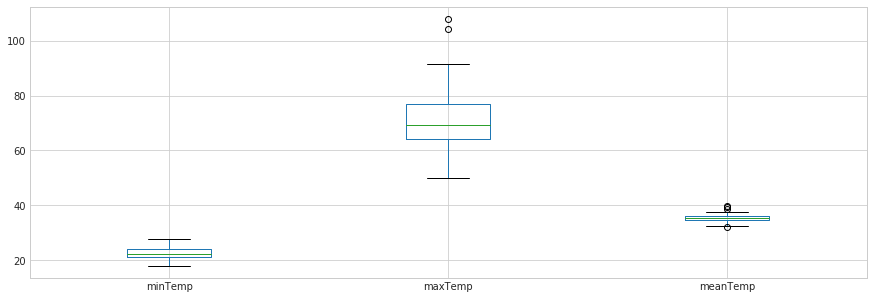

In [109]:
temp_df.boxplot()

# Lets make a nicer figure in R through python

In [136]:
import rpy2

In [139]:
%load_ext rpy2.ipython

In [145]:
%%R
library(tidyverse)
library(ggforce)
temp_df <- read.csv('/home/faske/g/BIOL792/week12/temp_df.csv')

In [158]:
%%R
head(na.omit(temp_df))

                     X minTemp maxTemp meanTemp
1   1901302108_H7_D_13    27.8    60.9 36.73806
2   1901302108_H7_D_14    24.9    52.2 32.70658
4   1901302109_H7_S_14    20.8    89.4 36.52438
6  1901302110_H13_S_14    22.8    60.9 32.24003
8   1901302115_H1_S_14    23.2    79.8 36.58339
10 1901302117_H15_S_14    23.7    67.5 34.97413


In [164]:
%%R
temp_long_df <- gather(na.omit(temp_df),'stat','temp',-X)
temp_long_df$stat2 <- as.numeric(as.factor(temp_long_df$stat))
head(temp_long_df)

                    X    stat temp stat2
1  1901302108_H7_D_13 minTemp 27.8     3
2  1901302108_H7_D_14 minTemp 24.9     3
3  1901302109_H7_S_14 minTemp 20.8     3
4 1901302110_H13_S_14 minTemp 22.8     3
5  1901302115_H1_S_14 minTemp 23.2     3
6 1901302117_H15_S_14 minTemp 23.7     3


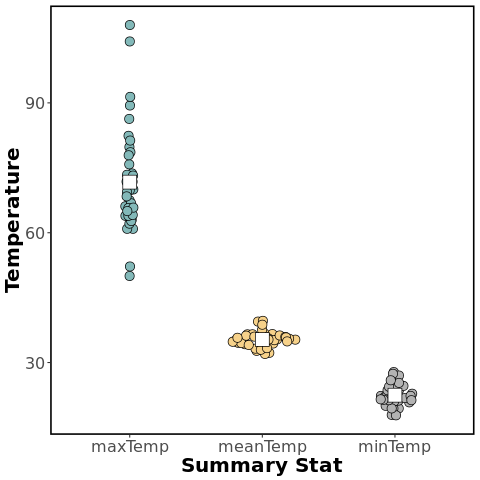

In [173]:
%%R
options(repr.plot.width = 7, repr.plot.height = 5)

ggplot(temp_long_df,aes(x=stat,y=temp,fill=stat)) +
  geom_sina(maxwidth = 0.5, na.rm = T, size = 4,pch=21,colour='black') +
  stat_summary(fun.data = mean_cl_boot, geom = "errorbar", width = 5,size=3,color='black',position = position_dodge(width = 0.5)) +
  stat_summary(aes(fill=factor(stat2,levels=c('3','2','1'))),fun.y = mean, geom = "point", size = 7,color='black',pch=22,position = position_dodge(width = 0.5)) +
  scale_fill_manual(values=c('white','white','white','#83B9B9','#F7D28A','grey70')) +
  theme_bw() + xlab("Summary Stat") + ylab("Temperature") + 
  theme(axis.text = element_text(size=16), 
        axis.title = element_text(size = 20, colour="black",face = "bold"),
        panel.border = element_rect(size = 1.5, colour = "black"),
        legend.text = element_text(size = 11),
        legend.position = 'none',
        strip.background = element_blank(),
        panel.grid = element_blank())